# LGMVIP Task 9- Handwritten equation solver using CNN

### Importing Libraries

In [1]:
import numpy as np
import cv2
from PIL import Image
from matplotlib import pyplot as plt
%matplotlib inline
import os
from os import listdir
from os.path import isfile, join
import pandas as pd
import pickle

In [2]:
def load_images_from_folder(folder):
    train_data=[]
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename),cv2.IMREAD_GRAYSCALE)
        img=~img
        if img is not None:
            ret,thresh=cv2.threshold(img,127,255,cv2.THRESH_BINARY)

            ctrs,ret=cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
            cnt=sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])
            w=int(28)
            h=int(28)
            maxi=0
            for c in cnt:
                x,y,w,h=cv2.boundingRect(c)
                maxi=max(w*h,maxi)
                if maxi==w*h:
                    x_max=x
                    y_max=y
                    w_max=w
                    h_max=h
            im_crop= thresh[y_max:y_max+h_max+10, x_max:x_max+w_max+10]
            im_resize = cv2.resize(im_crop,(28,28))
            im_resize=np.reshape(im_resize,(784,1))
            train_data.append(im_resize)
    return train_data

In [3]:
data=[]

In [4]:
# Assign '-' = 10
data=load_images_from_folder('data//extracted_images//-//')
len(data)
for i in range(0,len(data)):
    data[i]=np.append(data[i],['10'])
    
print(len(data))

33997


In [5]:
# Assign + = 11
data11=load_images_from_folder('data//extracted_images//+//')

for i in range(0,len(data11)):
    data11[i]=np.append(data11[i],['11'])
data=np.concatenate((data,data11))
print(len(data))

59109


In [6]:
data0=load_images_from_folder('data//extracted_images//0//')

for i in range(0,len(data0)):
    data0[i]=np.append(data0[i],['0'])
data=np.concatenate((data,data0))
print(len(data))

66023


In [7]:
data1=load_images_from_folder('data//extracted_images//1//')

for i in range(0,len(data1)):
    data1[i]=np.append(data1[i],['1'])
data=np.concatenate((data,data1))
print(len(data))

92543


In [8]:
data2=load_images_from_folder('data//extracted_images//2//')

for i in range(0,len(data2)):
    data2[i]=np.append(data2[i],['2'])
data=np.concatenate((data,data2))
print(len(data))

118684


In [9]:
data3=load_images_from_folder('data//extracted_images//3//')

for i in range(0,len(data3)):
    data3[i]=np.append(data3[i],['3'])
data=np.concatenate((data,data3))
print(len(data))

129593


In [10]:
data4=load_images_from_folder('data//extracted_images//4//')

for i in range(0,len(data4)):
    data4[i]=np.append(data4[i],['4'])
data=np.concatenate((data,data4))
print(len(data))

136989


In [11]:
data5=load_images_from_folder('data//extracted_images//5//')

for i in range(0,len(data5)):
    data5[i]=np.append(data5[i],['5'])
data=np.concatenate((data,data5))
print(len(data))

140534


In [12]:
data6=load_images_from_folder('data//extracted_images//6//')

for i in range(0,len(data6)):
    data6[i]=np.append(data6[i],['6'])
data=np.concatenate((data,data6))
print(len(data))

143652


In [13]:
data7=load_images_from_folder('data//extracted_images//7//')

for i in range(0,len(data7)):
    data7[i]=np.append(data7[i],['7'])
data=np.concatenate((data,data7))
print(len(data))

146561


In [14]:
data8=load_images_from_folder('data//extracted_images//8//')

for i in range(0,len(data8)):
    data8[i]=np.append(data8[i],['8'])
data=np.concatenate((data,data8))
print(len(data))

149629


In [15]:
data9=load_images_from_folder('data//extracted_images//9//')

for i in range(0,len(data9)):
    data9[i]=np.append(data9[i],['9'])
data=np.concatenate((data,data9))
print(len(data))

153366


In [16]:
data12=load_images_from_folder('data//extracted_images//times//')

for i in range(0,len(data12)):
    data12[i]=np.append(data12[i],['12'])
data=np.concatenate((data,data12))
print(len(data))

156617


In [17]:
df=pd.DataFrame(data,index=None)
df.to_csv('train_final.csv',index=False)

**Data Extraction has been completed**

### Importing Dataset

In [19]:
df_train=pd.read_csv('train_final.csv',index_col=False)
labels=df_train[['784']]

In [20]:
df_train.drop(df_train.columns[[784]],axis=1,inplace=True)
df_train.head(10)

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0
1,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0
2,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0
3,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0
4,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,255,255,...,0,0,0,0,0,0,0,0,0,0
9,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0


In [21]:
np.random.seed(1212)
import keras
from keras.models import Model
from keras.layers import *
from keras import optimizers
from keras.layers import Input, Dense
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.image_data_format()

'channels_last'

In [22]:
labels=np.array(labels)

In [23]:
from keras.utils.np_utils import to_categorical
cat=to_categorical(labels,num_classes=13)

In [24]:
print(cat[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [25]:
df_train.head(10)

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0
1,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0
2,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0
3,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0
4,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,255,255,...,0,0,0,0,0,0,0,0,0,0
9,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0


In [26]:
df_train.shape

(156617, 784)

In [27]:
temp=df_train.to_numpy()

In [28]:
X_train = temp.reshape(temp.shape[0], 28, 28, 1)

In [29]:
temp.shape[0]

156617

In [30]:
X_train.shape

(156617, 28, 28, 1)

In [31]:
l=[]
for i in range(50621):
    l.append(np.array(df_train[i:i+1]).reshape(1,28,28))


In [32]:
np.random.seed(7)

In [33]:
X_train.shape

(156617, 28, 28, 1)

### Building the CNN model

In [34]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=(28, 28,1), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(15, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(13, activation='softmax'))

In [35]:
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Training the Model

In [36]:
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [37]:
model.fit(X_train, cat, epochs=10, batch_size=200,shuffle=True,verbose=1)

Epoch 1/10
784/784 [==============================] - 73s 91ms/step - loss: 0.3926 - accuracy: 0.9032
Epoch 2/10
784/784 [==============================] - 71s 91ms/step - loss: 0.0699 - accuracy: 0.9801
Epoch 3/10
784/784 [==============================] - 66s 85ms/step - loss: 0.0450 - accuracy: 0.9870
Epoch 4/10
784/784 [==============================] - 76s 96ms/step - loss: 0.0322 - accuracy: 0.9908
Epoch 5/10
784/784 [==============================] - 74s 95ms/step - loss: 0.0244 - accuracy: 0.9928
Epoch 6/10
784/784 [==============================] - 82s 105ms/step - loss: 0.0210 - accuracy: 0.9940
Epoch 7/10
784/784 [==============================] - 74s 94ms/step - loss: 0.0202 - accuracy: 0.9944
Epoch 8/10
784/784 [==============================] - 86s 110ms/step - loss: 0.0159 - accuracy: 0.9952
Epoch 9/10
784/784 [==============================] - 79s 100ms/step - loss: 0.0141 - accuracy: 0.9957
Epoch 10/10
784/784 [==============================] - 78s 99ms/step - loss: 0.

In [38]:
model_json = model.to_json()
with open("model_final.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model_final.h5")

In [39]:
import cv2
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
# K.set_image_dim_ordering('th')
from keras.models import model_from_json

In [40]:
json_file = open('model_final.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model_final.h5")

In [41]:
print(5)

5


In [42]:
import cv2
import numpy as np
img = cv2.imread('test.jpg',cv2.IMREAD_GRAYSCALE)

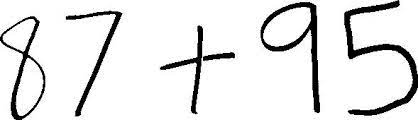

In [43]:
img

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [44]:
if img is not None:
    #images.append(img)
    img=~img
    ret,thresh=cv2.threshold(img,127,255,cv2.THRESH_BINARY)
    ctrs,ret=cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    cnt=sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])
    w=int(28)
    h=int(28)
    train_data=[]
    print(len(cnt))
    rects=[]
    for c in cnt :
        x,y,w,h= cv2.boundingRect(c)
        rect=[x,y,w,h]
        rects.append(rect)
    print(rects)
    bool_rect=[]
    for r in rects:
        l=[]
        for rec in rects:
            flag=0
            if rec!=r:
                if r[0]<(rec[0]+rec[2]+10) and rec[0]<(r[0]+r[2]+10) and r[1]<(rec[1]+rec[3]+10) and rec[1]<(r[1]+r[3]+10):
                    flag=1
                l.append(flag)
            if rec==r:
                l.append(0)
        bool_rect.append(l)
    print(bool_rect)
    dump_rect=[]
    for i in range(0,len(cnt)):
        for j in range(0,len(cnt)):
            if bool_rect[i][j]==1:
                area1=rects[i][2]*rects[i][3]
                area2=rects[j][2]*rects[j][3]
                if(area1==min(area1,area2)):
                    dump_rect.append(rects[i])
    print(len(dump_rect)) 
    final_rect=[i for i in rects if i not in dump_rect]
    print(final_rect)
    for r in final_rect:
        x=r[0]
        y=r[1]
        w=r[2]
        h=r[3]
        im_crop =thresh[y:y+h+10,x:x+w+10]
        

        im_resize = cv2.resize(im_crop,(28,28))


        im_resize=np.reshape(im_resize,(28,28,1))
        train_data.append(im_resize)

9
[[0, 16, 45, 104], [2, 18, 35, 35], [15, 57, 29, 60], [66, 11, 56, 105], [160, 26, 43, 88], [203, 52, 32, 9], [261, 2, 59, 111], [262, 6, 50, 42], [344, 0, 74, 116]]
[[0, 1, 1, 0, 0, 0, 0, 0, 0], [1, 0, 1, 0, 0, 0, 0, 0, 0], [1, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0]]
5
[[0, 16, 45, 104], [66, 11, 56, 105], [160, 26, 43, 88], [261, 2, 59, 111], [344, 0, 74, 116]]


In [45]:
s=''
for i in range(len(train_data)):
    train_data[i]=np.array(train_data[i])
    train_data[i]=train_data[i].reshape(1,28,28,1)
#     result=loaded_model.predict_classes(train_data[i])
    result=np.argmax(loaded_model.predict(train_data[i]), axis=-1)
    if(result[0]==10):
        s=s+'-'
    if(result[0]==11):
        s=s+'+'
    if(result[0]==12):
        s=s+'*'
    if(result[0]==0):
        s=s+'0'
    if(result[0]==1):
        s=s+'1'
    if(result[0]==2):
        s=s+'2'
    if(result[0]==3):
        s=s+'3'
    if(result[0]==4):
        s=s+'4'
    if(result[0]==5):
        s=s+'5'
    if(result[0]==6):
        s=s+'6'
    if(result[0]==7):
        s=s+'7'
    if(result[0]==8):
        s=s+'8'
    if(result[0]==9):
        s=s+'9'
    
eval(s)

1/1 [==============================] - 0s 33ms/step


182